<a href="https://colab.research.google.com/github/juanfranbrv/curso-langchain/blob/main/Graph%20simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture --no-stderr
%pip install langgraph -qU

## Estado

En primer lugar, defina el Estado del grafo.

El esquema de Estado sirve como esquema de entrada para todos los Nodos y Aristas del grafo.


`TypedDict` es una clase que permite definir diccionarios con tipos espec√≠ficos para sus claves. Es √∫til para proporcionar anotaciones de tipo m√°s precisas para diccionarios en Python. `TypedDict` est√° disponible en la biblioteca est√°ndar de Python a partir de la versi√≥n 3.8.

`TypedDict`pertenece al m√≥dulo `typing` en Python. Es un m√≥dulo de la biblioteca est√°ndar que proporciona soporte para anotaciones de tipo (type hints). Estas anotaciones permiten especificar los tipos esperados de variables, argumentos de funciones, valores de retorno y estructuras de datos, lo que mejora la claridad del c√≥digo y permite a herramientas como **mypy** realizar verificaciones est√°ticas de tipos.

- **`State`**: Es una clase que hereda de `TypedDict`. Esto significa que `State` define la estructura de un diccionario con claves y tipos de valores espec√≠ficos.
    
- **`graph_state: str`**: Indica que el diccionario debe tener una clave llamada `graph_state`, y su valor debe ser de tipo `str` (cadena de texto).
    

En resumen, `State` es un diccionario tipado que debe tener la siguiente estructura:

```
{
    "graph_state": "algun_valor_de_tipo_str"
}
```



In [2]:
from typing import TypedDict

class State(TypedDict):
    graph_state: str

## Nodos

Los nodos no son m√°s que funciones python.

El primer argumento posicional es el estado, como se ha definido anteriormente.

Dado que el estado es un TypedDict con el esquema definido anteriormente, cada nodo puede acceder a la clave, graph_state, con `state['graph_state']`.

Cada nodo devuelve un nuevo valor de la clave de estado graph_state.

Por defecto, el nuevo valor devuelto por cada nodo sobreescribir√° el valor de estado anterior.



In [3]:
def nodo_1(state):
    print("---Nodo 1---")
    return {"graph_state": state['graph_state'] +" Soy "}   #Estamos actualizando el estado (estado anterior + un string) y devolviendolo

def nodo_2(state):
    print("---Nodo 2---")
    return {"graph_state": state['graph_state'] +" feliz!"}

def nodo_3(state):
    print("---Nodo 3---")
    return {"graph_state": state['graph_state'] +" triste!"}

## Aristas

In [4]:
Las aristas conectan los nodos.

Las aristas normales se utilizan si desea ir siempre, por ejemplo, del nodo_1 al nodo_2.

Las aristas condicionales se utilizan si desea establecer una ruta opcional entre nodos.

Las aristas condicionales se implementan como funciones que devuelven el siguiente nodo a visitar seg√∫n cierta l√≥gica.

SyntaxError: invalid syntax (<ipython-input-4-4cabf5c93fd6>, line 1)

In [5]:
import random
from typing import Literal


# Esta funcion "decide" / devuelve nodo_2 o nodo_3 de forma aleatoria
def decide_mood(state) -> Literal["nodo_2", "nodo_3"]:

    # Often, we will use state to decide on the next node to visit
    user_input = state['graph_state']

    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "nodo_2"

    # 50% of the time, we return Node 3
    return "nodo_3"

Ahora, construimos el gr√°fico a partir de los componentes definidos anteriormente.

La clase StateGraph es la clase de gr√°fico que podemos utilizar.

Primero, inicializamos un StateGraph con la clase State que definimos anteriormente.

Luego, agregamos nuestros nodos y aristas.

Usamos el nodo START, un nodo especial que env√≠a la entrada del usuario al gr√°fico, para indicar d√≥nde comenzar nuestro gr√°fico.

El nodo END es un nodo especial que representa un nodo terminal.

Por √∫ltimo, compilamos nuestro gr√°fico para realizar algunas comprobaciones b√°sicas en la estructura del gr√°fico.

Podemos visualizar el gr√°fico mermaid.

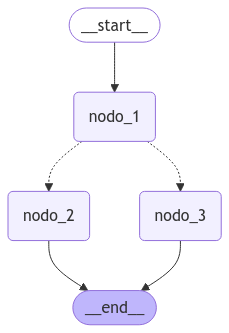

In [6]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
builder = StateGraph(State)
builder.add_node("nodo_1", nodo_1)
builder.add_node("nodo_2", nodo_2)
builder.add_node("nodo_3", nodo_3)

# Logic
builder.add_edge(START, "nodo_1")
builder.add_conditional_edges("nodo_1", decide_mood)
builder.add_edge("nodo_2", END)
builder.add_edge("nodo_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

## Invocacion del grafo

El gr√°fico compilado implementa el protocolo Runnable.

Esto proporciona una forma est√°ndar de ejecutar componentes LangChain.

La invocaci√≥n es uno de los m√©todos est√°ndar en esta interfaz.

La entrada es un diccionario {"graph_state": "Hola, soy lance."}, que establece el valor inicial para nuestro diccionario de estado del gr√°fico.

Cuando se llama a la invocaci√≥n, el gr√°fico comienza la ejecuci√≥n desde el nodo START.

Avanza a trav√©s de los nodos definidos (nodo_1, nodo_2, nodo_3) en orden.

La arista condicional atravesar√° desde el nodo 1 al nodo 2 o 3 utilizando una regla de decisi√≥n 50/50.

Cada funci√≥n de nodo recibe el estado actual y devuelve un nuevo valor, que anula el estado del gr√°fico.

La ejecuci√≥n contin√∫a hasta que llega al nodo END.

In [7]:
graph.invoke({"graph_state" : "Hi, this is Lance."})

---Nodo 1---
---Nodo 3---


{'graph_state': 'Hi, this is Lance. Soy  triste!'}

Reto

Crear un grafo de este tipo y ejecutarlo
Debe tener 8 nodos (donde los nodos 2 y 3 presentan senda opciones) y todos teminan en END



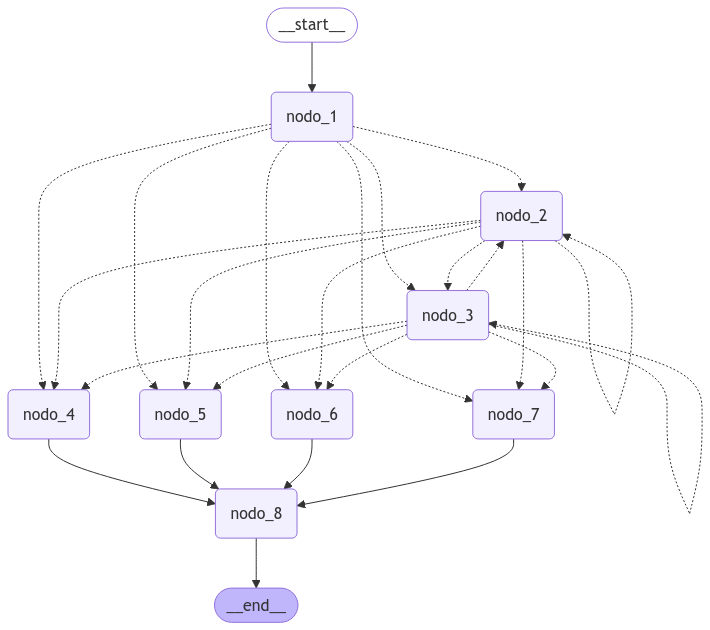

Nodo1‚Äî‚ÄîNodo2‚Äî‚ÄîNodo5‚Äî‚ÄîNodo8

{'graph_state': 'Nodo1‚Äî‚ÄîNodo2‚Äî‚ÄîNodo5‚Äî‚ÄîNodo8', 'nodo_actual': 'nodo_8'}

In [19]:
# Por claridad, volvemos a realizar aqui las importaciones necesarias
import random
from typing import Literal, TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Definimos la estructura del estado usando TypedDict
class State(TypedDict):
    graph_state: str
    nodo_actual: str

# DEFINIMOS LOS NODOS
def nodo_1(state: State) -> State:
    print("Nodo1‚Äî",end="")
    return {"graph_state": state['graph_state'] + "Nodo1‚Äî", "nodo_actual": "nodo_1"}

def nodo_2(state: State) -> State:
    print("‚ÄîNodo2‚Äî",end="")
    return {"graph_state": state['graph_state'] + "‚ÄîNodo2‚Äî", "nodo_actual": "nodo_2"}

def nodo_3(state: State) -> State:
    print("‚ÄîNodo3‚Äî",end="")
    return {"graph_state": state['graph_state'] + "‚ÄîNodo3‚Äî", "nodo_actual": "nodo_3"}

def nodo_4(state: State) -> State:
    print("‚ÄîNodo4‚Äî",end="")
    return {"graph_state": state['graph_state'] + "‚ÄîNodo4‚Äî", "nodo_actual": "nodo_4"}

def nodo_5(state: State) -> State:
    print("‚ÄîNodo5‚Äî",end="")
    return {"graph_state": state['graph_state'] + "‚ÄîNodo5‚Äî", "nodo_actual": "nodo_5"}

def nodo_6(state: State) -> State:
    print("‚ÄîNodo6‚Äî",end="")
    return {"graph_state": state['graph_state'] + "‚ÄîNodo6‚Äî", "nodo_actual": "nodo_6"}

def nodo_7(state: State) -> State:
    print("‚ÄîNodo7‚Äî",end="")
    return {"graph_state": state['graph_state'] + "‚ÄîNodo7‚Äî", "nodo_actual": "nodo_7"}

def nodo_8(state: State) -> State:
    print("‚ÄîNodo8",end="")
    return {"graph_state": state['graph_state'] + "‚ÄîNodo8", "nodo_actual": "nodo_8"}


# CREAMOS UNA FUNCION GENERICA PARA SALIR DE LOS NODOS CONDICIONALES
def decidir_nodo(state) -> Literal["nodo_2", "nodo_3", "nodo_4", "nodo_5", "nodo_6", "nodo_7"]:
    nodo_actual = state["nodo_actual"]
    if nodo_actual == "nodo_1":
        # Decide aleatoriamente entre nodo_2 y nodo_3 con un 50% de probabilidad
        return random.choice(["nodo_2", "nodo_3"])
    elif nodo_actual == "nodo_2":
        # Decide aleatoriamente entre nodo_4 y nodo_5 con un 50% de probabilidad
        return random.choice(["nodo_4", "nodo_5"])
    elif nodo_actual == "nodo_3":
        # Decide aleatoriamente entre nodo_6 y nodo_7 con un 50% de probabilidad
        return random.choice(["nodo_6", "nodo_7"])
    else:
        # Si el nodo actual no es nodo_1, nodo_2 o nodo_3, devuelve None o un mensaje de error
        return nodo_actual + "Nodo no v√°lido"

# Build graph
builder = StateGraph(State)
builder.add_node("nodo_1", nodo_1)
builder.add_node("nodo_2", nodo_2)
builder.add_node("nodo_3", nodo_3)
builder.add_node("nodo_4", nodo_4)
builder.add_node("nodo_5", nodo_5)
builder.add_node("nodo_6", nodo_6)
builder.add_node("nodo_7", nodo_7)
builder.add_node("nodo_8", nodo_8)

# Logic y aristas
builder.add_edge(START, "nodo_1")
builder.add_conditional_edges("nodo_1", decidir_nodo)
builder.add_conditional_edges("nodo_2", decidir_nodo)
builder.add_conditional_edges("nodo_3", decidir_nodo)
builder.add_edge("nodo_4", "nodo_8")
builder.add_edge("nodo_5", "nodo_8")
builder.add_edge("nodo_6", "nodo_8")
builder.add_edge("nodo_7", "nodo_8")
builder.add_edge("nodo_8", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

# Ejecutamos el grafo
graph.invoke({"graph_state": "", "nodo_actual": "nodo_1"})

### **Reto 2: Sistema de Decisi√≥n con Retroalimentaci√≥n**

#### Descripci√≥n:

Debes crear un grafo que modele un sistema de decisi√≥n con retroalimentaci√≥n. El grafo tendr√° los siguientes componentes:

1. **Nodos principales**:
    
    - `nodo_inicio`: El nodo inicial.
        
    - `nodo_A`, `nodo_B`, `nodo_C`: Nodos intermedios que toman decisiones.
        
    - `nodo_final`: El nodo final del grafo.
        
2. **L√≥gica de decisiones**:
    
    - Desde `nodo_inicio`, el grafo debe decidir aleatoriamente entre `nodo_A`, `nodo_B` o `nodo_C`.
        
    - Desde `nodo_A`, el grafo debe decidir aleatoriamente entre volver a `nodo_inicio` o ir a `nodo_final`.
        
    - Desde `nodo_B`, el grafo debe decidir aleatoriamente entre ir a `nodo_A` o `nodo_C`.
        
    - Desde `nodo_C`, el grafo siempre debe ir a `nodo_final`.
        
3. **Retroalimentaci√≥n**:
    
    - Si el grafo pasa por `nodo_A` m√°s de una vez, debe registrar cu√°ntas veces ha pasado por este nodo en el estado.
        
    - Si el grafo pasa por `nodo_A` m√°s de 3 veces, debe forzar la salida a `nodo_final`.
        
4. **Salida**:
    
    - El grafo debe terminar en `nodo_final` despu√©s de un n√∫mero razonable de iteraciones.
        

---

### Requisitos del Reto:

1. **Estado del grafo**:
    
    - El estado debe incluir:
        
        - `graph_state`: Una cadena que registre el camino recorrido.
            
        - `nodo_actual`: El nodo en el que se encuentra actualmente.
            
        - `contador_A`: Un contador que registre cu√°ntas veces se ha pasado por `nodo_A`.
            
2. **Funciones de nodo**:
    
    - Cada nodo debe actualizar el estado del grafo y decidir el siguiente nodo seg√∫n la l√≥gica descrita.
        
3. **Condiciones de retroalimentaci√≥n**:
    
    - Si el grafo pasa por `nodo_A` m√°s de 3 veces, debe forzar la salida a `nodo_final`.
        
4. **Visualizaci√≥n**:
    
    - Usa `graph.get_graph().draw_mermaid_png()` para visualizar el grafo.

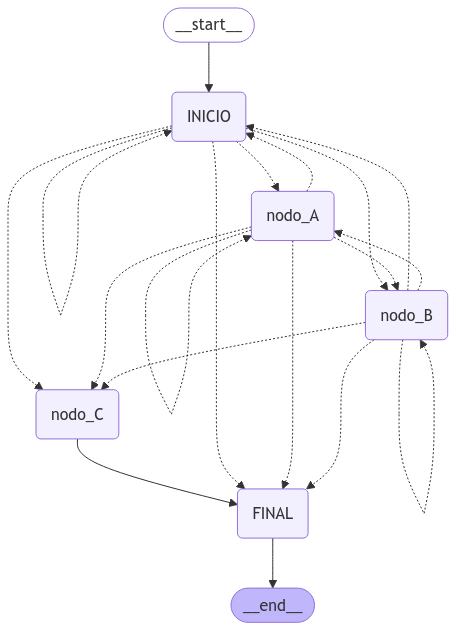

{'graph_state': '‚ÄîINICIO‚Äî‚ÄîA‚Äî‚ÄîINICIO‚Äî‚ÄîA‚Äî‚ÄîFINAL‚Äî',
 'nodo_actual': 'FINAL',
 'contador_A': 2}

In [34]:
# Por claridad, volvemos a realizar aqui las importaciones necesarias
import random
from typing import Literal, TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Definimos la estructura del estado usando TypedDict
class State(TypedDict):
    graph_state: str  # cadena que registra el camino recorrido de la forma INICIO-A--B-C-INICIO-A-FINAL
    nodo_actual: str
    contador_A: int

# DEFINIMOS LOS NODOS
def INICIO(state: State) -> State:
    return {"graph_state": state['graph_state'] + "‚ÄîINICIO‚Äî", "nodo_actual": "INICIO", "contador_A": state["contador_A"]}

def nodo_A(state: State) -> State:
    # print("‚ÄîNodo2‚Äî",end="")
    return {"graph_state": state['graph_state'] + "‚ÄîA‚Äî", "nodo_actual": "nodo_A", "contador_A": state["contador_A"]+1}

def nodo_B(state: State) -> State:
    # print("‚ÄîNodo3‚Äî",end="")
    return {"graph_state": state['graph_state'] + "‚ÄîB‚Äî", "nodo_actual": "nodo_B", "contador_A": state["contador_A"]}

def nodo_C(state: State) -> State:
    # print("‚ÄîNodo4‚Äî",end="")
    return {"graph_state": state['graph_state'] + "‚ÄîC‚Äî", "nodo_actual": "nodo_C", "contador_A": state["contador_A"]}

def FINAL(state: State) -> State:
    # print("‚ÄîNodo5‚Äî",end="")
    return {"graph_state": state['graph_state'] + "‚ÄîFINAL‚Äî", "nodo_actual": "FINAL", "contador_A": state["contador_A"]}


# CREAMOS UNA FUNCION GENERICA PARA SALIR DE LOS NODOS CONDICIONALES
def decidir_nodo(state) -> Literal["INICIO", "nodo_A", "nodo_B","nodo_C","FINAL"]:
    nodo_actual = state["nodo_actual"]
    contador_A= state["contador_A"]
    if nodo_actual == "INICIO":
        # Decide aleatoriamente A,B,C
        return random.choice(["nodo_A", "nodo_B", "nodo_C"])
    elif nodo_actual == "nodo_A":
        # Decide aleatoriamente entre INICIO y FINAL con un 50% de probabilidad, si no ha pasado por aqui >3 veces
        if contador_A>3:
            return "FINAL"
        else:
            return random.choice(["INICIO", "FINAL"])
    elif nodo_actual == "nodo_B":
        # Decide aleatoriamente entre nodo_
        return random.choice(["nodo_A", "nodo_C"])
    else:
        # Si el nodo actual no es nodo_1, nodo_2 o nodo_3, devuelve None o un mensaje de error
        return nodo_actual + "Nodo no v√°lido"

# Build graph
builder = StateGraph(State)
builder.add_node("INICIO", INICIO)
builder.add_node("nodo_A", nodo_A)
builder.add_node("nodo_B", nodo_B)
builder.add_node("nodo_C", nodo_C)
builder.add_node("FINAL", FINAL)

# Logic y aristas
builder.add_edge(START, "INICIO")
builder.add_conditional_edges("INICIO", decidir_nodo)
builder.add_conditional_edges("nodo_A", decidir_nodo)
builder.add_conditional_edges("nodo_B", decidir_nodo)
builder.add_edge("nodo_C", "FINAL")
builder.add_edge("FINAL", END)


# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

# Ejecutamos el grafo
graph.invoke({"graph_state": "", "nodo_actual": "nodo_1", "contador_A": 0})


## Reto 3: Grafo con Ponderaci√≥n de Caminos y Decisiones Condicionales

#### Descripci√≥n

Construye un grafo en LangGraph en el que:

1.  Los nodos representen estaciones en un viaje ficticio por tren.
2.  Cada nodo devuelve el estado del viaje, incluyendo el nombre de la estaci√≥n y el tiempo acumulado del trayecto.
3.  Las transiciones entre estaciones tengan **pesos aleatorios**, representando el tiempo en minutos para llegar a la siguiente estaci√≥n.
4.  Los pesos influyan en la decisi√≥n del camino a tomar: siempre selecciona el camino con **el menor peso**.
5.  El grafo tiene al menos 6 estaciones (nodos) y debe incluir una estaci√≥n final.

#### Ejemplo del Flujo

-   Empiezas en la estaci√≥n `Estaci√≥n A`.
-   Desde `Estaci√≥n A`, puedes decidir entre ir a `Estaci√≥n B` o `Estaci√≥n C`.
    -   El peso (tiempo) entre A -> B es 10 minutos.
    -   El peso (tiempo) entre A -> C es 15 minutos.
    -   Decides ir a `Estaci√≥n B` porque es m√°s r√°pido.
-   El viaje termina en `Estaci√≥n F`, acumulando el tiempo total del trayecto

#### Detalles Espec√≠ficos

1.  **Nodos requeridos:**
    
    -   `Estaci√≥n A`, `Estaci√≥n B`, `Estaci√≥n C`, `Estaci√≥n D`, `Estaci√≥n E`, `Estaci√≥n F`.
2.  **Transiciones requeridas:**
    
    -   Al menos 2 opciones posibles en cada nodo (excepto en el nodo final).
3.  **Estado del grafo:**
    
    -   Incluye `current_station` y `total_time` como parte del estado.
4.  **Funci√≥n de decisi√≥n personalizada:**
    
    -   Usa un diccionario para definir pesos entre estaciones y selecciona din√°micamente el mejor camino (menor peso).
5.  **Salida:**
    
    -   Al final, imprime el tiempo total del trayecto y la ruta tomada.

### Pista

-   Usa un diccionario como este para manejar los pesos:


`pesos = {     "Estaci√≥n A": {"Estaci√≥n B": 10, "Estaci√≥n C": 15},     "Estaci√≥n B": {"Estaci√≥n D": 20, "Estaci√≥n E": 25},     "Estaci√≥n C": {"Estaci√≥n E": 10, "Estaci√≥n D": 15},     "Estaci√≥n D": {"Estaci√≥n F": 30},     "Estaci√≥n E": {"Estaci√≥n F": 20} }`

-   En la funci√≥n de decisi√≥n, usa `min(pesos[nodo_actual], key=pesos[nodo_actual].get)` para encontrar la estaci√≥n m√°s cercana.


üëâüèªEn el contexto de LangGraph, el estado debe actualizarse SOLO dentro de las funciones de los nodos siempre que quieras que los cambios sean persistentes y pasados al siguiente nodo. Esto se debe a c√≥mo LangGraph maneja el estado

Razones para Actualizar el Estado en los Nodos
Estado Inmutable:

El estado que recibe cada funci√≥n de nodo es efectivamente una copia. Si intentas modificarlo directamente (por ejemplo, state["clave"] += valor), ese cambio no se reflejar√° en el flujo del grafo porque LangGraph espera que cada funci√≥n retorne un nuevo estado actualizado.
Debe actualizarse mediante el retorno, nunca modificarlo directamente.

In [49]:
from typing import Literal, TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Definimos la estructura del estado
class State(TypedDict):
    estacion_actual: str
    total_acumulado: int
    ruta: str

# DEFINIMOS LOS NODOS
def estacion_A(state: State) -> State:
    print("‚ÄîEstaci√≥n A‚Äî", end="")
    return {
        "estacion_actual": "Estaci√≥n A",
        "total_acumulado": state["total_acumulado"],
        "ruta": state["ruta"] + "‚ÄîA‚Äî",
    }

def estacion_B(state: State) -> State:
    print("‚ÄîEstaci√≥n B‚Äî", end="")
    tiempo = pesos[state["estacion_actual"]]["Estaci√≥n B"]
    return {
        "estacion_actual": "Estaci√≥n B",
        "total_acumulado": state["total_acumulado"] + tiempo,
        "ruta": state["ruta"] + "‚ÄîB‚Äî",
    }

def estacion_C(state: State) -> State:
    print("‚ÄîEstaci√≥n C‚Äî", end="")
    tiempo = pesos[state["estacion_actual"]]["Estaci√≥n C"]
    return {
        "estacion_actual": "Estaci√≥n C",
        "total_acumulado": state["total_acumulado"] + tiempo,
        "ruta": state["ruta"] + "‚ÄîC‚Äî",
    }

def estacion_D(state: State) -> State:
    print("‚ÄîEstaci√≥n D‚Äî", end="")
    tiempo = pesos[state["estacion_actual"]]["Estaci√≥n D"]
    return {
        "estacion_actual": "Estaci√≥n D",
        "total_acumulado": state["total_acumulado"] + tiempo,
        "ruta": state["ruta"] + "‚ÄîD‚Äî",
    }

def estacion_E(state: State) -> State:
    print("‚ÄîEstaci√≥n E‚Äî", end="")
    tiempo = pesos[state["estacion_actual"]]["Estaci√≥n E"]
    return {
        "estacion_actual": "Estaci√≥n E",
        "total_acumulado": state["total_acumulado"] + tiempo,
        "ruta": state["ruta"] + "‚ÄîE‚Äî",
    }

def estacion_F(state: State) -> State:
    print("‚ÄîEstaci√≥n F‚Äî", end="")
    tiempo = pesos[state["estacion_actual"]]["Estaci√≥n F"]
    return {
        "estacion_actual": "Estaci√≥n F",
        "total_acumulado": state["total_acumulado"] + tiempo,
        "ruta": state["ruta"] + "‚ÄîF‚Äî",
    }

# Pesos entre estaciones
pesos = {
    "Estaci√≥n A": {"Estaci√≥n B": 10, "Estaci√≥n C": 15},
    "Estaci√≥n B": {"Estaci√≥n D": 20, "Estaci√≥n E": 25},
    "Estaci√≥n C": {"Estaci√≥n E": 10, "Estaci√≥n D": 15},
    "Estaci√≥n D": {"Estaci√≥n F": 30},
    "Estaci√≥n E": {"Estaci√≥n F": 20},
}

# Funci√≥n para decidir la siguiente estaci√≥n
def decidir_siguiente_estacion(state: State) -> Literal["Estaci√≥n B", "Estaci√≥n C", "Estaci√≥n D", "Estaci√≥n E", "Estaci√≥n F"]:
    estacion_actual = state["estacion_actual"]
    if estacion_actual in pesos:
        # Selecciona la estaci√≥n con el menor peso
        #min() puede encontrar la key con menor valor !!
        siguiente_estacion = min(pesos[estacion_actual], key=pesos[estacion_actual].get)
        return siguiente_estacion
    else:
        return "Estaci√≥n F"  # Si no hay m√°s opciones, ir a la estaci√≥n final

# Instanciamos un Grafo
builder = StateGraph(State)

# A√±adir nodos
builder.add_node("Estaci√≥n A", estacion_A)
builder.add_node("Estaci√≥n B", estacion_B)
builder.add_node("Estaci√≥n C", estacion_C)
builder.add_node("Estaci√≥n D", estacion_D)
builder.add_node("Estaci√≥n E", estacion_E)
builder.add_node("Estaci√≥n F", estacion_F)

# A√±adimos la l√≥gica y las aristas
builder.add_edge(START, "Estaci√≥n A")
builder.add_conditional_edges("Estaci√≥n A", decidir_siguiente_estacion)
builder.add_conditional_edges("Estaci√≥n B", decidir_siguiente_estacion)
builder.add_conditional_edges("Estaci√≥n C", decidir_siguiente_estacion)
builder.add_conditional_edges("Estaci√≥n D", decidir_siguiente_estacion)
builder.add_conditional_edges("Estaci√≥n E", decidir_siguiente_estacion)
builder.add_edge("Estaci√≥n F", END)

# Compilamos el grafo
graph = builder.compile()

# Estado inicial
initial_state = {"estacion_actual": "Estaci√≥n A", "total_acumulado": 0, "ruta": ""}

# Ejecutar el grafo
result = graph.invoke(initial_state)

# Mostrar resultados
print("\nRuta tomada:", result["ruta"])
print("Tiempo total del trayecto:", result["total_acumulado"], "minutos")

‚ÄîEstaci√≥n A‚Äî‚ÄîEstaci√≥n B‚Äî‚ÄîEstaci√≥n D‚Äî‚ÄîEstaci√≥n F‚Äî
Ruta tomada: ‚ÄîA‚Äî‚ÄîB‚Äî‚ÄîD‚Äî‚ÄîF‚Äî
Tiempo total del trayecto: 60 minutos
